In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [6]:
# 1. Generate simulated data (House Size vs Price)
# np.random.seed(42)
# house_sizes = np.random.normal(100, 20, 100)  # House area (sqm)
# house_prices = 50000 + 3000 * house_sizes + np.random.normal(0, 20000, 100)  # Price (USD)
#
# # Create DataFrame
# data01 = pd.DataFrame({'Area': house_sizes, 'Price': house_prices})
#
#
# data01.to_csv('ex_housing.csv', index=False, float_format='%.4f')

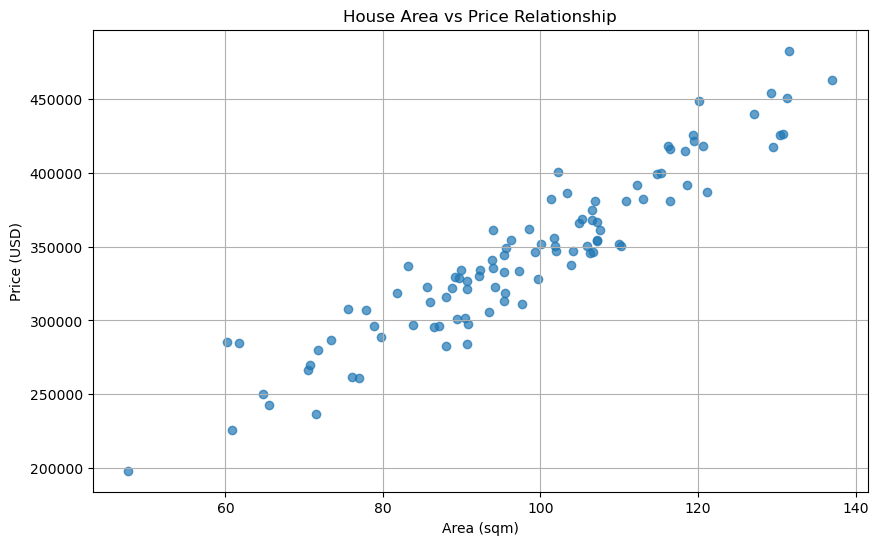

In [7]:
# 2. Data Visualization
data = pd.read_csv('./DATA/ex_housing.csv')
plt.figure(figsize=(10, 6))
plt.scatter(data['Area'], data['Price'], alpha=0.7)
plt.title('House Area vs Price Relationship')
plt.xlabel('Area (sqm)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [8]:
# 3. Prepare Data
X = data['Area']  # Feature
y = data['Price']  # Target

# Add constant for intercept term
X = sm.add_constant(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# 4. Create and train model
model = sm.OLS(y_train, X_train)
results = model.fit()

In [10]:
# 5. Model Evaluation
# Get predictions on test set
y_pred = results.predict(X_test)

# Print model summary
print(results.summary())

# Calculate additional metrics
residuals = y_test - y_pred
mse = np.mean(residuals**2)
print(f"\nMean Squared Error (MSE): {mse:.2f}")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     621.8
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           6.58e-39
Time:                        11:54:52   Log-Likelihood:                -900.97
No. Observations:                  80   AIC:                             1806.
Df Residuals:                      78   BIC:                             1811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.444e+04   1.14e+04      5.656      0.0

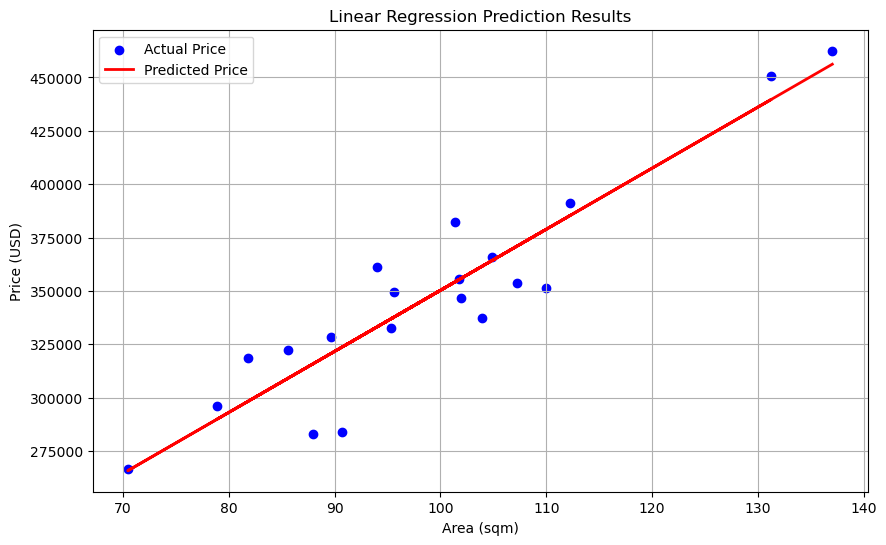

In [11]:

# 6. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Area'], y_test, color='blue', label='Actual Price')
plt.plot(X_test['Area'], y_pred, color='red', linewidth=2, label='Predicted Price')
plt.title('Linear Regression Prediction Results')
plt.xlabel('Area (sqm)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# 7. Prediction Example
new_data = pd.DataFrame({'const': 1, 'Area': [120]})  # Predict for 120 sqm
predicted_price = results.predict(new_data)
print(f"\nPredicted price for 120 sqm house: ${predicted_price[0]:.2f}")


Predicted price for 120 sqm house: $407461.90
